In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/datetime/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(36)]

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                index_col=0,
                                                encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [5]:
people = 'people30000'
seed = '123'
csv = 'census'

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


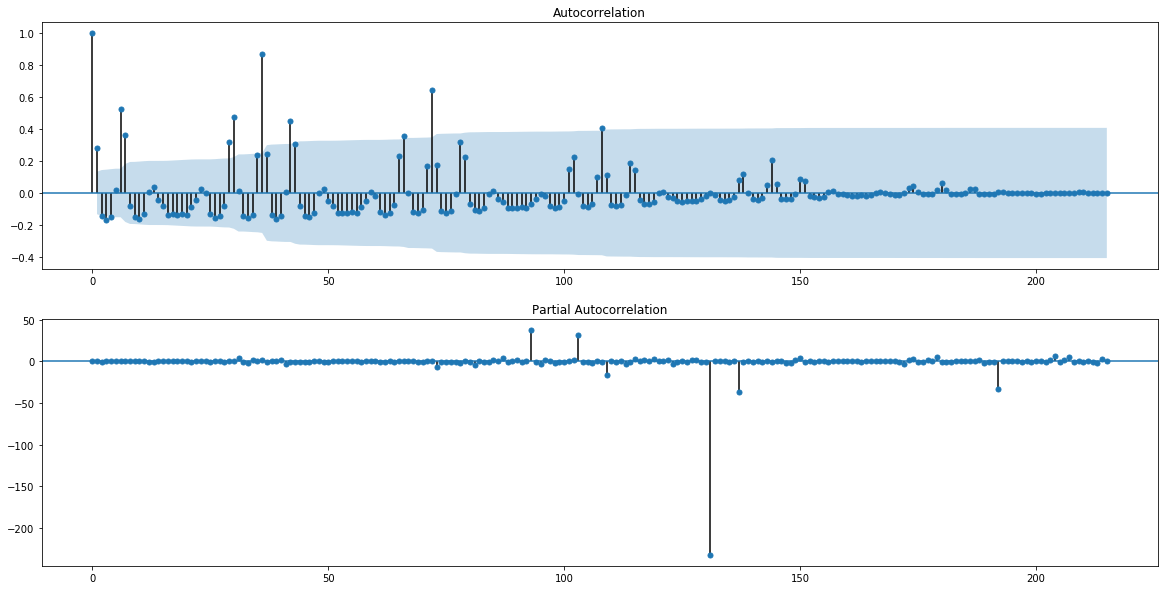

In [6]:
import statsmodels.api as sm

df = csv_array[people][seed][csv].copy()
ts = df['y']
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_acf(ts, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(ts, ax=ax2)

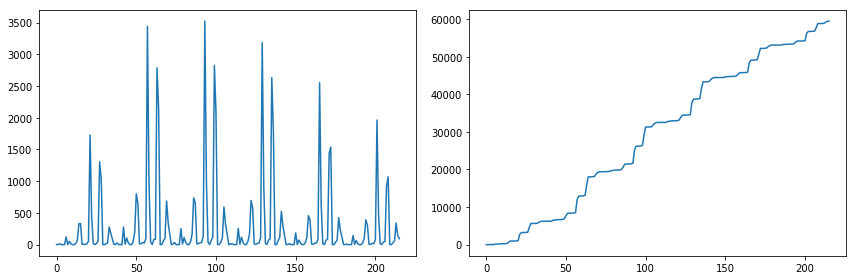

In [7]:
fig = plt.figure(figsize=(12, 4))

# 元のデータ
ax1 = fig.add_subplot(121)
ts = np.asanyarray(df['y'])
plt.plot(ts)

# 階差のデータ
ax2 = fig.add_subplot(122)
diff = np.cumsum(ts)
plt.plot(diff)

plt.tight_layout() # グラフ間スキマ調整

(4, 2)


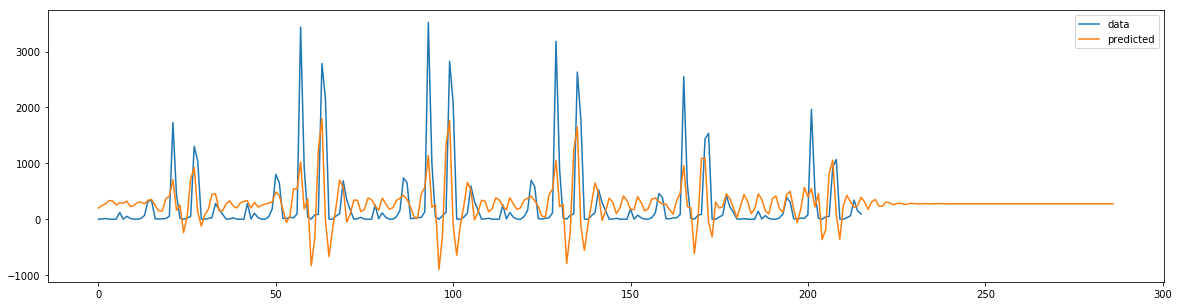

In [21]:
resDiff = sm.tsa.arma_order_select_ic(ts, ic='aic', trend='nc')
p = resDiff['aic_min_order'][0]
q = resDiff['aic_min_order'][1]
print(resDiff['aic_min_order'])
model = sm.tsa.ARIMA(ts,order=(p,0,q))
result = model.fit()

fig = plt.figure(figsize=(20,5))
plt.clf()
plt.plot(ts)
plt.plot(result.predict(start=1,end=215+72))
plt.legend(['data','predicted'])
plt.show()